# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [1]:
import pandas as pd

In [2]:
#Importando e lendo as variáveis
df = pd.read_csv('demo01 (3).csv')
df.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')

In [6]:
#Tipos de dados de cada variável
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [12]:
#Quantidade de missings
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [35]:
qtd_mau = df.mau.value_counts()
pct_mau = round(df.mau.value_counts() / len(df.mau) * 100, 2)

print(f'Quantidade de maus pagadores \n{qtd_mau}\n')
print(f'Porcentagem de maus pagadores \n{pct_mau}')

Quantidade de maus pagadores 
mau
False    16260
True       390
Name: count, dtype: int64

Porcentagem de maus pagadores 
mau
False    97.66
True      2.34
Name: count, dtype: float64


#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [37]:
# possui_email/ possui_fone/ possui_fone_comercial/ possui_celular/ posse_de_imovel/ posso_de_veiculo/ sexo

2.1 Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável

In [38]:
colunas = list(df.columns)
tipos = list(df.dtypes)
tipo_dados = pd.DataFrame(tipos, colunas)
tipo_dados

,0
sexo,object
posse_de_veiculo,object
posse_de_imovel,object
qtd_filhos,int64
tipo_renda,object
educacao,object
estado_civil,object
tipo_residencia,object
idade,float64
tempo_emprego,float64


2.2 Adicione uma coluna nesse dataframe chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável

In [42]:
tipo_dados['qtd_categorias'] = list(df.nunique())
tipo_dados

,0,qtd_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


2.3 Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}

#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [43]:
df_limpo = pd.get_dummies(df, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
df_limpo.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False


In [45]:
df_limpo.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
sexo_M                                       bool
posse_de_veiculo_Y                           bool
posse_de_imovel_Y                            bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Higher education                    bool
educacao_Incomplete higher                   bool
educacao_Lower secondary                     bool
educacao_Secondary / secondary special       bool


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [55]:
# Primeiro o cruzamento de tabela entre mau e possui_email
mau_possui_email = pd.crosstab(df_limpo['mau'], df_limpo['possui_email'])
pct_mau_possui_email = round(mau_possui_email.apply(lambda r: r/r.sum(), axis=1) * 100, 2)
pct_mau_possui_email

possui_email,0,1
mau,,
False,91.08,8.92
True,92.31,7.69


<Axes: xlabel='mau'>

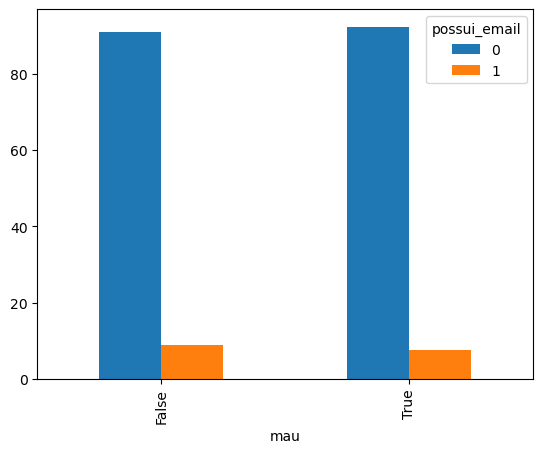

In [59]:
pct_mau_possui_email.plot.bar()

In [57]:
# Agora entre mau e posse_de_veicullo
mau_possui_veiculo = pd.crosstab(df_limpo['mau'], df_limpo['posse_de_veiculo_Y'])
pct_mau_possui_veiculo = round(mau_possui_veiculo.apply(lambda r: r/r.sum(), axis=1) * 100, 2)
pct_mau_possui_veiculo

posse_de_veiculo_Y,False,True
mau,,
False,61.08,38.92
True,63.33,36.67


<Axes: xlabel='mau'>

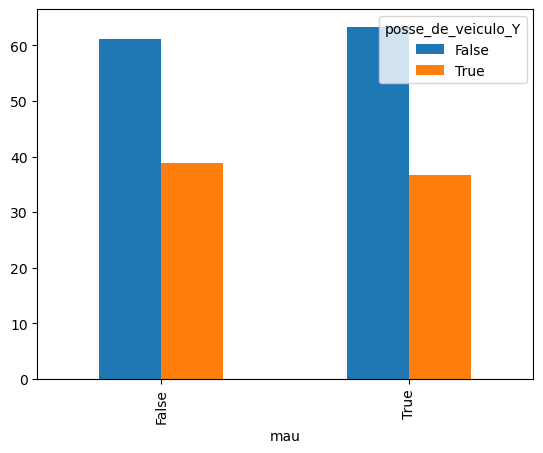

In [58]:
pct_mau_possui_veiculo.plot.bar()

Os dois gráficos não possuem nenhuma discrepancia tendo em conta que a diferenca de porcentagem entre os maus pagadores que possuem ou nao email ou carro, não passa dos 3%

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [61]:
df_limpo.to_csv('dados_limpos.csv')